# Lineær regresjon (ISTX1001/2/3)

## Kalori og høydemeter på løpeturer

I dette eksempelet skal vi bruke lineær regresjon for å modellere sammenhengen mellom antall høydemeter klatret i løpet av en joggetur og (estimert) kaloriforbruk. Merk at en løpeklokke ikke måler kaloriforbruk, så vi må anta at det finnes en algoritme som estimerer kaloriforbruk ved å ta i bruk en rekke forklaringsvariabler (tid, distanse, puls, etc.)

#### Hvorfor høydemeter som forklaringsvariabel?
Vi kan tenke oss at joggeturer med mange oppoverbakker er mer *krevende* enn de joggeturerne som går på flata. Vi ønsker å sjekke denne hypotesen ved å tilpasse en lineær regresjonsmodell mellom antall høydemeter og kaloriforbruk. 

#### Hva skal du se etter?
Ved å se på dette eksempelet *etter* at du har studert modellen for tid og distanse på løpeturer, kan du forstå mer av korrelasjon, $R$, og målet på hvor god modellen er, $R^2$, forteller oss. Det burde være åpenbart at antall høydemeter ikke vil være den eneste forklaringsvariabelen for kaloriforbruk, og dermed ser vi at den enkle regresjonsmodellen ikke klarer å forklare en særlig stor andel av variasjonen kaloriforbruk på løpeturer.

In [18]:
import pandas as pd # lese data fra csv-fil og bruke DataFrames
import seaborn as sns # plotting
import matplotlib.pyplot as plt # mer plotting
import numpy as np # matematikk
import statsmodels.api as sms # regresjonen
import statsmodels.formula.api as smf # formel for regresjonen

import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)# fordi en av plottefunksjonene må oppdateres av utvikler og kommer per i dag med lang FutureWarning som vi ikke vil se på

sns.set_context("notebook", font_scale=1.5)

## Lese inn data

In [35]:
df = pd.read_csv('https://www.math.ntnu.no/emner/IST100x/python_felles/lopedata_del2.csv') # lese inn datasettet
print(df.shape)

(55, 2)


**Kommentar:** Datasettet består av 55 rader (observasjoner) og 2 kolonner

In [21]:
df.sort_values(by=['Hoydemeter'],inplace=True)  # Sorterer datasettet mhp høydemeter (for plotting)
df.head()

,Hoydemeter,Kalorier
50,4,194
39,8,180
43,17,362
47,19,356
49,26,333


## Beskrivende statistikk

### Gjennomsnitt og standardavvik

In [22]:
gjsnitt_hoyde = sum(df['Hoydemeter'])/55
avvik = [(x - gjsnitt_hoyde) ** 2 for x in df['Hoydemeter']]
sd_hoyde = np.sqrt(sum(avvik)/54)

print("Gjennomsnittlig antall høydemeter:", round(gjsnitt_hoyde,2), "m")
print("Standardavvik:", round(sd_hoyde,2), "m")

Gjennomsnittlig antall høydemeter: 77.55 m
Standardavvik: 37.98 m


In [23]:
gjsnitt_kalori = sum(df['Kalorier'])/55
avvik_kalori = [(x - gjsnitt_kalori) ** 2 for x in df['Kalorier']]
sd_kalori = np.sqrt(sum(avvik_kalori)/54)

print("Gjennomsnittlig kaloriforbruk:", round(gjsnitt_kalori,2))
print("Standardavvik:", round(sd_kalori,2))

Gjennomsnittlig kaloriforbruk: 327.96
Standardavvik: 83.94


## Kryssplott / Spredningsplott og korrelasjon

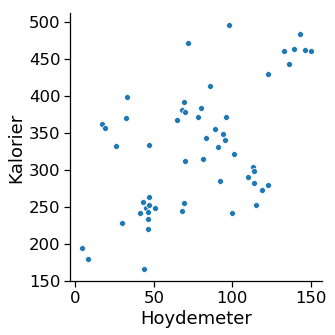

            Hoydemeter  Kalorier
Hoydemeter    1.000000  0.528293
Kalorier      0.528293  1.000000


In [24]:
sns.relplot(x='Hoydemeter', y='Kalorier',data = df)
plt.show()
print(df.corr())

## Lineær regresjon

### Tilpasse modell

In [29]:
modell = smf.ols('Kalorier~Hoydemeter', data=df).fit()

modell.summary()  # Merk R^2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Kalorier   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     20.52
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           3.39e-05
Time:                        11:14:35   Log-Likelihood:                -312.19
No. Observations:                  55   AIC:                             628.4
Df Residuals:                      53   BIC:                             632.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    237.4211     22.218     10.686      0.000     192.858     281.984
Hoydemeter     1.1676      0.258      4.530      0.000       0.651       1.685
==============================================================================
Omnibus:                        5.832   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                2.472
Skew:                           0.180   Prob(JB):                        0.291
Kurtosis:                       2.026   Cond. No.                         197.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Konfidensintervall og prediksjonsintervall

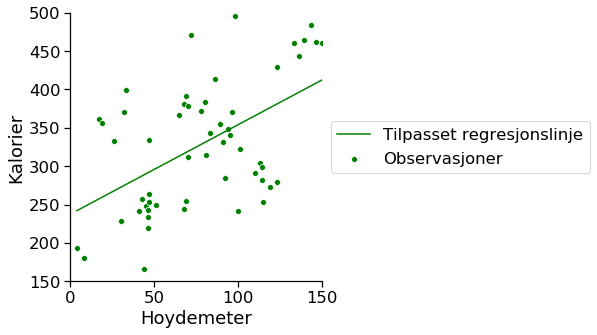

In [30]:
predres = modell.get_prediction().summary_frame(alpha = 0.05)
df_pred = pd.concat([df[["Hoydemeter","Kalorier"]], predres], axis=1)

sns.relplot(x="Hoydemeter", y="Kalorier",data = df_pred, color = "g", label="Observasjoner")
sns.lineplot(x='Hoydemeter', y='mean', data = df_pred, color = "g",label = "Tilpasset regresjonslinje")

plt.ylim(150, 500); plt.xlim(0, 150); plt.ylabel("Kalorier")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

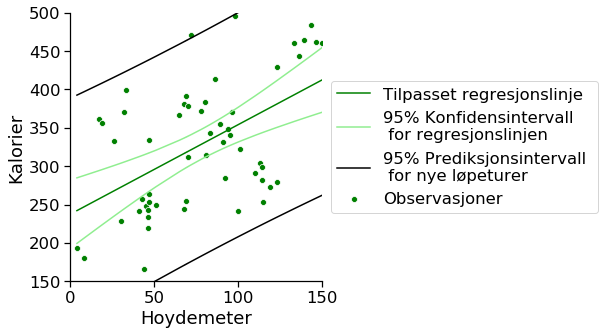

In [31]:
sns.relplot(x="Hoydemeter", y="Kalorier",data = df_pred, color = "g", label="Observasjoner")
sns.lineplot(x='Hoydemeter', y='mean', data = df_pred, color = "g",label = "Tilpasset regresjonslinje")

sns.lineplot(x='Hoydemeter', y='mean_ci_lower', data = df_pred, color = "lightgreen",label = "95% Konfidensintervall \n for regresjonslinjen")
sns.lineplot(x='Hoydemeter', y='mean_ci_upper', data = df_pred, color = "lightgreen")

sns.lineplot(x='Hoydemeter', y='obs_ci_lower', data = df_pred, color = "black",label = "95% Prediksjonsintervall \n for nye løpeturer")
sns.lineplot(x='Hoydemeter', y='obs_ci_upper', data = df_pred, color = "black")

plt.ylim(150, 500); plt.xlim(0, 150); plt.ylabel("Kalorier")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Modellsjekk med residualplott

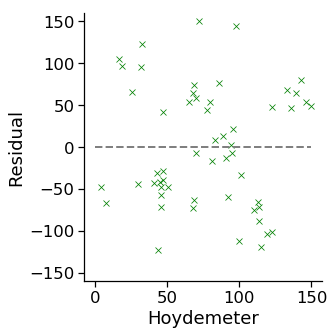

In [32]:
df_resid = pd.DataFrame({"Hoydemeter": df["Hoydemeter"], "Residual": modell.resid} ) 
sns.relplot(x='Hoydemeter', y="Residual",data = df_resid,marker="x",color="g")
plt.plot([0, 150], [0, 0], color = "grey",linewidth=2, linestyle = "--")
plt.ylim(-160,160)
plt.show()

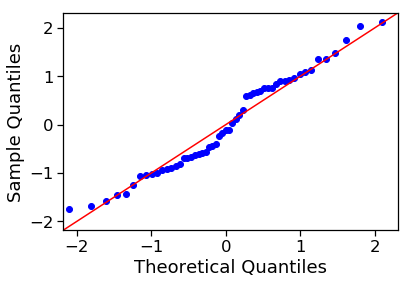

In [33]:
sms.qqplot(modell.resid,line='45',fit=True)
plt.show()

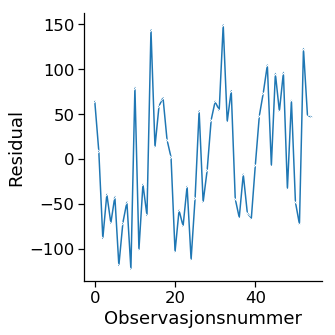

In [34]:
df_resid['Observasjonsnummer'] = df_resid.index
sns.relplot(x='Observasjonsnummer', y="Residual",
            data = df_resid,marker="x", kind="line")
plt.show()